In [ ]:
import os
import shutil

source_dir = '/content/drive/My Drive/emotion_data/train'
output_dir = '/content/drive/My Drive/CPS4982dataset'

# Create destination folder
os.makedirs(output_dir, exist_ok=True)

# integrate images
counter = 1  # Used to rename a file
for category in os.listdir(source_dir):
    category_path = os.path.join(source_dir, category)
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            src = os.path.join(category_path, img_file)
            dest = os.path.join(output_dir, f'image_{counter}.jpg')  # rename
            shutil.copy(src, dest)
            counter += 1

print(f"Data integration complete, total {counter-1} pictures has been saved to {output_dir}")



Data integration complete, total 28939 pictures has been saved to /content/drive/My Drive/CPS4982dataset


In [ ]:
import os
import cv2
import numpy as np

# Define the data set path
data_dir = "/content/drive/My Drive/CPS4982dataset"
image_files = os.listdir(data_dir)

# Preprocessed images (uniform size and normalization)
def preprocess_image(img_path, target_size=(48, 48)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # normalization
    return img

#Load the data and store it in an array
images = []
for img_file in image_files:
    img_path = os.path.join(data_dir, img_file)
    images.append(preprocess_image(img_path))
images = np.array(images)

print(f"Successfully load {len(images)} image with size {images.shape}")


Successfully load 28939 image with size (28939, 48, 48)


In [ ]:
import os

# Define the path to the train folder
train_dir = '/content/drive/My Drive/emotion_data/train'

# Initializes the result store dictionary
emotion_counts = {}

# Traverse the subfolders in the train folder
for emotion in os.listdir(train_dir):
    emotion_path = os.path.join(train_dir, emotion)
    if os.path.isdir(emotion_path):
        # Count the number of images in the subfolder
        num_images = len([f for f in os.listdir(emotion_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        emotion_counts[emotion] = num_images

# Output the number of images for each emotion category
for emotion, count in emotion_counts.items():
    print(f"Category: {emotion}, Number of images: {count}")

Category: disgust, Number of images: 436
Category: angry, Number of images: 4125
Category: surprise, Number of images: 3171
Category: fear, Number of images: 4147
Category: sad, Number of images: 4830
Category: neutral, Number of images: 4985
Category: happy, Number of images: 7245


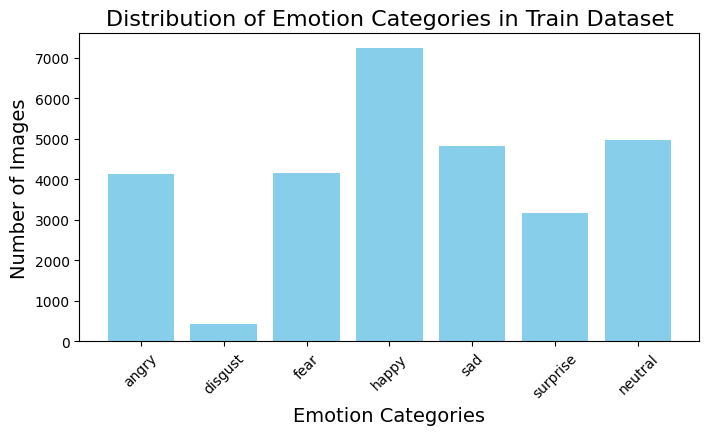

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/emotion_data/train'

# Define emotional categories
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Count the number of images in each category
categories = []
counts = []
for emotion in emotion_classes:
    folder_path = os.path.join(train_dir, emotion)
    if os.path.exists(folder_path):
        num_images = len([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        categories.append(emotion)
        counts.append(num_images)

# Draw a bar chart
plt.figure(figsize=(8, 4))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Emotion Categories', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Distribution of Emotion Categories in Train Dataset', fontsize=16)
plt.xticks(rotation=45)
plt.show()




```
# 此内容为代码格式
```

1. **Using model**

In [ ]:
!pip install protobuf==3.20


In [ ]:
!pip install deepface


In [ ]:
analysis = DeepFace.analyze(img_path=image_path, actions=['emotion'], enforce_detection=False)
print(analysis)  # Print analysis results


[{'emotion': {'angry': 1.2110259383916855, 'disgust': 0.0009744944691192359, 'fear': 0.46910070814192295, 'happy': 94.35577988624573, 'sad': 3.926233947277069, 'surprise': 0.0015176186025200877, 'neutral': 0.03536069707479328}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 47, 'h': 47, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0}]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set the data set path
input_dir = '/content/drive/My Drive/CPS4982dataset'
output_dir = '/content/drive/My Drive/CPS4982dataset_sorted'

# Create a sorted folder
import os
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
os.makedirs(output_dir, exist_ok=True)
for emotion in emotion_classes:
    os.makedirs(os.path.join(output_dir, emotion), exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from deepface import DeepFace
import shutil
import os
from PIL import Image

# Configure Paths
input_dir = '/content/drive/My Drive/CPS4982dataset'
output_dir = '/content/drive/My Drive/CPS4982dataset_sorted'

# Create a sorted folder
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
os.makedirs(output_dir, exist_ok=True)
for emotion in emotion_classes:
    os.makedirs(os.path.join(output_dir, emotion), exist_ok=True)

# Traverse and classify the images
image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    image_path = os.path.join(input_dir, image_file)
    try:
        # Use DeepFace for sentiment analysis
        analysis = DeepFace.analyze(img_path=image_path, actions=['emotion'], enforce_detection=False)

        # Extract 'dominant_emotion'
        emotions = analysis[0]['emotion']  # Retrieves the 'emotion' dictionary for the first element from the returned list
        predicted_emotion = max(emotions, key=emotions.get)  # Get the emotion category with the greatest probability value

        #Move the picture to the emotion category folder
        if predicted_emotion in emotion_classes:
            target_folder = os.path.join(output_dir, predicted_emotion)
            shutil.move(image_path, os.path.join(target_folder, image_file))
            print(f"Image {image_file} Classified as {predicted_emotion}")
        else:
            print(f"Image {image_file} classification failed, emotion not recognized")
    except Exception as e:
        print(f"Error processing image {image_file} : {e}")


流式输出内容被截断，只能显示最后 5000 行内容。
Image image_5879.jpg Classified as surprise
Image image_5880.jpg Classified as neutral
Image image_5881.jpg Classified as surprise
Image image_5882.jpg Classified as surprise
Image image_5883.jpg Classified as angry
Image image_5884.jpg Classified as surprise
Image image_5885.jpg Classified as surprise
Image image_5886.jpg Classified as angry
Image image_5887.jpg Classified as surprise
Image image_5888.jpg Classified as surprise
Image image_5889.jpg Classified as fear
Image image_5890.jpg Classified as surprise
Image image_5891.jpg Classified as surprise
Image image_5892.jpg Classified as surprise
Image image_5893.jpg Classified as neutral
Image image_5894.jpg Classified as surprise
Image image_5895.jpg Classified as surprise
Image image_5896.jpg Classified as surprise
Image image_5897.jpg Classified as surprise
Image image_5898.jpg Classified as surprise
Image image_5899.jpg Classified as surprise
Image image_5900.jpg Classified as surprise
Image image_5901.

In [ ]:
!ls "/content/drive/My Drive/CPS4982dataset_sorted"


angry  disgust	fear  happy  neutral  sad  surprise


In [ ]:
for emotion in emotion_classes:
    folder_path = os.path.join(output_dir, emotion)
    num_images = len(os.listdir(folder_path))
    print(f"Category: {emotion}, Number of images: {num_images}")


Category: angry, Number of images: 3716
Category: disgust, Number of images: 279
Category: fear, Number of images: 3874
Category: happy, Number of images: 7233
Category: sad, Number of images: 4868
Category: surprise, Number of images: 2939
Category: neutral, Number of images: 6030


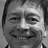

Displaying image from category: happy


In [ ]:
from IPython.display import display
from PIL import Image
import random

# Images are randomly selected from one of the classified emotion categories
emotion = 'happy'
folder_path = os.path.join(output_dir, emotion)
images = os.listdir(folder_path)

# Show random pictures
if images:
    random_image = random.choice(images)
    image_path = os.path.join(folder_path, random_image)
    img = Image.open(image_path)
    display(img)
    print(f"Displaying image from category: {emotion}")
else:
    print(f"No images found in category: {emotion}")


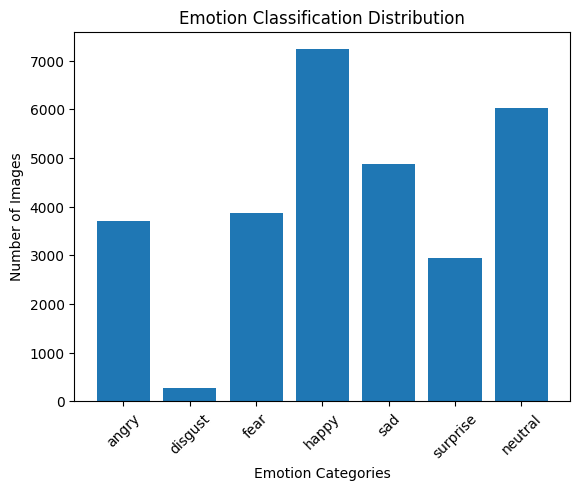

In [ ]:
import matplotlib.pyplot as plt

# Count pictures
categories = []
counts = []
for emotion in emotion_classes:
    folder_path = os.path.join(output_dir, emotion)
    num_images = len(os.listdir(folder_path))
    categories.append(emotion)
    counts.append(num_images)

# Draw a bar chart
plt.bar(categories, counts)
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Images')
plt.title('Emotion Classification Distribution')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Define the true number of labels and the predicted number
true_counts = [4125, 436, 4147, 7245, 4830, 3171, 4985]
predicted_counts = [3716, 279, 3874, 7233, 4868, 2939, 6030]

# Calculate the correct number of categories
correct_counts = [min(true, pred) for true, pred in zip(true_counts, predicted_counts)]

# Construct confusion matrix
conf_matrix = np.zeros((7, 7))
np.fill_diagonal(conf_matrix, correct_counts)

# Assume a uniform distribution of classification errors
for i in range(len(conf_matrix)):
    true_error = true_counts[i] - correct_counts[i]
    pred_error = predicted_counts[i] - correct_counts[i]
    error_distributed = min(true_error, pred_error) / (len(conf_matrix) - 1)
    conf_matrix[i] += error_distributed

# Print confusion matrix
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(pd.DataFrame(conf_matrix, columns=labels, index=labels))


           Angry  Disgust    Fear   Happy     Sad  Surprise  Neutral
Angry     3716.0      0.0     0.0     0.0     0.0       0.0      0.0
Disgust      0.0    279.0     0.0     0.0     0.0       0.0      0.0
Fear         0.0      0.0  3874.0     0.0     0.0       0.0      0.0
Happy        0.0      0.0     0.0  7233.0     0.0       0.0      0.0
Sad          0.0      0.0     0.0     0.0  4830.0       0.0      0.0
Surprise     0.0      0.0     0.0     0.0     0.0    2939.0      0.0
Neutral      0.0      0.0     0.0     0.0     0.0       0.0   4985.0


In [ ]:
# Computational accuracy
total_correct = sum(correct_counts)
total_images = sum(true_counts)
accuracy = total_correct / total_images
print(f"Accuracy: {accuracy:.2%}")

from sklearn.metrics import precision_score

# Constructing Real Tags and predictive Tags (simplified version)
y_true = ['Angry'] * true_counts[0] + ['Disgust'] * true_counts[1] + \
         ['Fear'] * true_counts[2] + ['Happy'] * true_counts[3] + \
         ['Sad'] * true_counts[4] + ['Surprise'] * true_counts[5] + ['Neutral'] * true_counts[6]

y_pred = ['Angry'] * predicted_counts[0] + ['Disgust'] * predicted_counts[1] + \
         ['Fear'] * predicted_counts[2] + ['Happy'] * predicted_counts[3] + \
         ['Sad'] * predicted_counts[4] + ['Surprise'] * predicted_counts[5] + ['Neutral'] * predicted_counts[6]

# Computational accuracy
precision = precision_score(y_true, y_pred, average='macro')
print(f"Precision: {precision:.2%}")

from sklearn.metrics import recall_score

# Calculate Recall
recall = recall_score(y_true, y_pred, average='macro')
print(f"Recall: {recall:.2%}")

from sklearn.metrics import f1_score

# Calculate F1- Score
f1 = f1_score(y_true, y_pred, average='macro')
print(f"F1-Score: {f1:.2%}")


Accuracy: 96.26%
Precision: 73.05%
Recall: 72.62%
F1-Score: 72.65%
